# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load Data

In [2]:
data = pd.read_csv('diabetes.csv')

# Print metrics

In [13]:
print("Statistical Summary for Numeric Values:")
for column in data.columns[:-1]:  # Exclude the 'class' column
    if data[column].dtype != 'object':
        print(f"\n{column} Statistics:")
        print(f"Min: {data[column].min()}")
        print(f"Max: {data[column].max()}")
        print(f"Mean: {data[column].mean()}")
        print(f"Median: {data[column].median()}")
        print(f"Standard Deviation: {data[column].std()}")

Statistical Summary for Numeric Values:

preg Statistics:
Min: 0
Max: 17
Mean: 3.8450520833333335
Median: 3.0
Standard Deviation: 3.3695780626988694

plas Statistics:
Min: 0
Max: 199
Mean: 120.89453125
Median: 117.0
Standard Deviation: 31.97261819513622

pres Statistics:
Min: 0
Max: 122
Mean: 69.10546875
Median: 72.0
Standard Deviation: 19.355807170644777

skin Statistics:
Min: 0
Max: 99
Mean: 20.536458333333332
Median: 23.0
Standard Deviation: 15.952217567727637

insu Statistics:
Min: 0
Max: 846
Mean: 79.79947916666667
Median: 30.5
Standard Deviation: 115.24400235133817

mass Statistics:
Min: 0.0
Max: 67.1
Mean: 31.992578124999998
Median: 32.0
Standard Deviation: 7.884160320375446

pedi Statistics:
Min: 0.078
Max: 2.42
Mean: 0.47187630208333325
Median: 0.3725
Standard Deviation: 0.3313285950127749

age Statistics:
Min: 21
Max: 81
Mean: 33.240885416666664
Median: 29.0
Standard Deviation: 11.760231540678685


# Print Zeroes

In [8]:
print("\nZero Counts in Each Column:")
for column in data.columns[:-1]:  # Exclude the 'class' column
    if data[column].dtype != 'object':
        zero_count = (data[column] == 0).sum()
        print(f"{column}: {zero_count}")


Zero Counts in Each Column:
preg: 111
plas: 5
pres: 35
skin: 227
insu: 374
mass: 11
pedi: 0
age: 0


In [ ]:
# Boxplot all values to get an idea of the data content

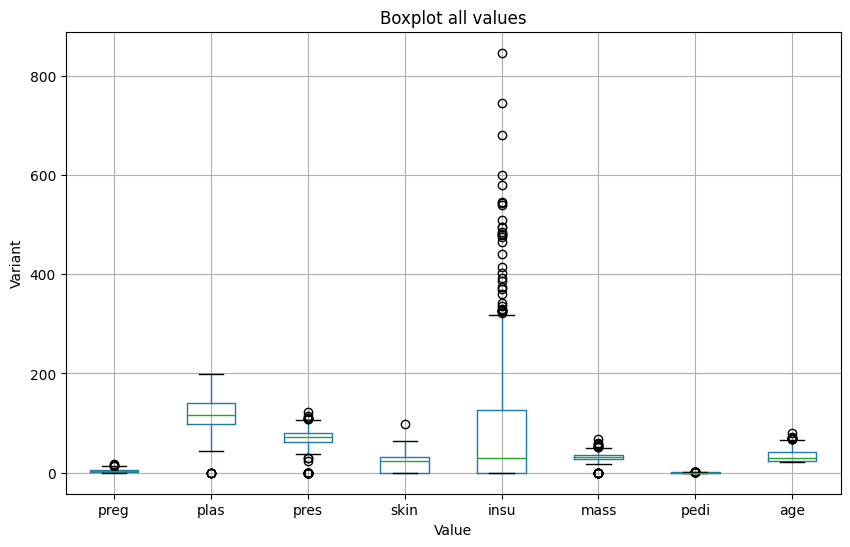

In [15]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot all values')
plt.suptitle('')  # Suppress the default title to only show the customized title
plt.xlabel('Value')
plt.ylabel('Variant')
plt.show()

# Specifically boxplot preg again, to get a visualization

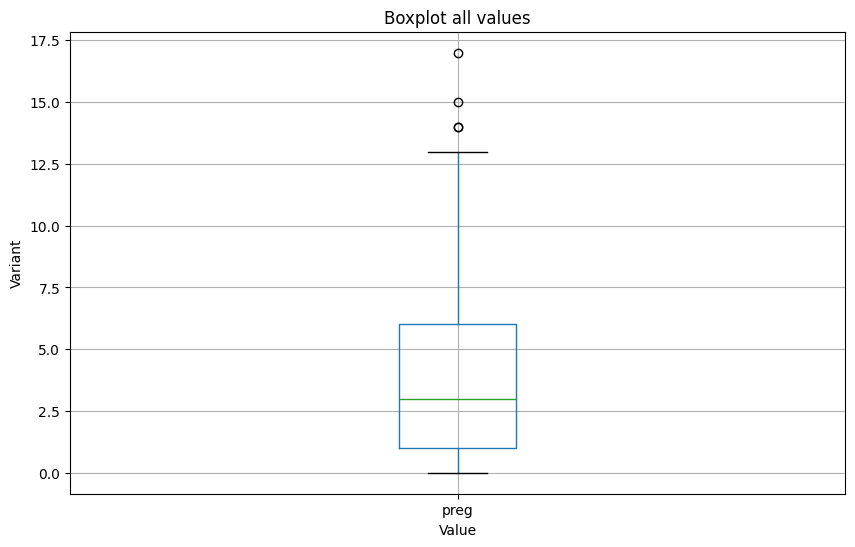

In [16]:
plt.figure(figsize=(10, 6))
data.boxplot(column="preg")
plt.title('Boxplot all values')
plt.suptitle('')  # Suppress the default title to only show the customized title
plt.xlabel('Value')
plt.ylabel('Variant')
plt.show()

# Plot pres

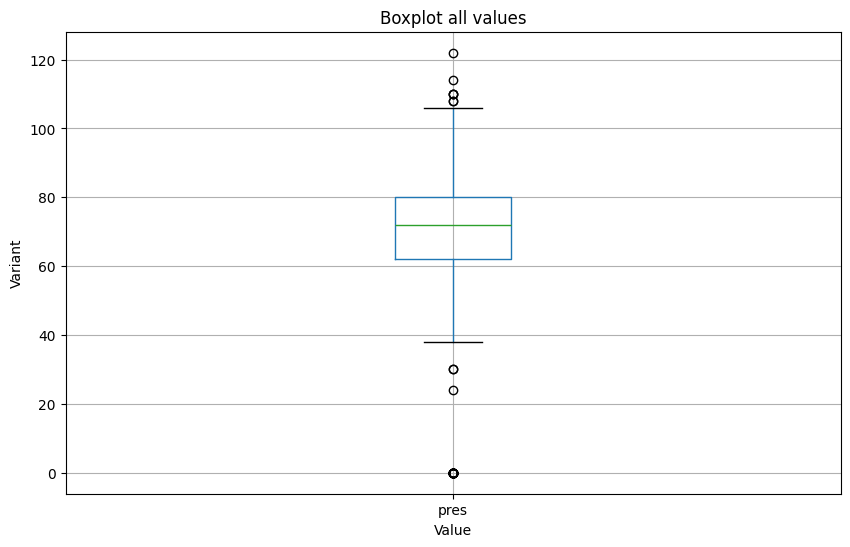

In [17]:
plt.figure(figsize=(10, 6))
data.boxplot(column="pres")
plt.title('Boxplot all values')
plt.suptitle('')  # Suppress the default title to only show the customized title
plt.xlabel('Value')
plt.ylabel('Variant')
plt.show()

# Interpretation: 

| Column | Description                        | Zero Count | Data Type | Zero Meaning    |
|--------|------------------------------------|------------|-----------|-----------------|
| plas   | Plasma glucose concentration       | 5          | int64     | Missing Data    |
| pres   | Blood pressure? Unexpected values. | 35         | int64     | Missing Data    |
| skin   | Triceps skin fold thickness        | 227        | int64     | Missing Data    |
| insu   | Serum insulin                      | 374        | int64     | Missing Data    |
| mass   | Body mass index                    | 11         | float64   | Missing Data    |
| preg   | Number of times pregnant??         | 111        | int64     | Meaningful (?)  |
| pedi   | Diabetes pedigree function         | 0          | float64   | Meaningful      |
| age    | Age in years                       | 0          | int64     | Meaningful      |
| class  | Class variable (outcome)           | 0          | category  | Meaningful      |

There are some things unexpected.
- While 'preg' in combination with diabetes most likely means pregnancy, and as the max value is 17, it may be the pregnancy count. A mean of 3.8 is unexpected, at least in Europe
- 'pres' could be the either the MAP or the diastolic pressure. Given the specifics it is most likely the diastolic pressure. The low outliers would be expectd (i.e. aortic regurgitation) in a polulation for diastolic, but not for MAP.
  
  


# Find out what is most likely classified

<Figure size 1000x600 with 0 Axes>

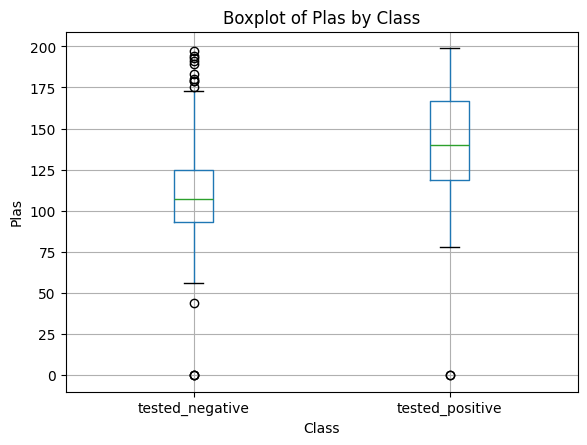

In [5]:

plt.figure(figsize=(10, 6))
data.boxplot(column='plas', by='class')
plt.title('Boxplot of Plas by Class')
plt.suptitle('')  # Suppress the default title to only show the customized title
plt.xlabel('Class')
plt.ylabel('Plas')
plt.show()

In [ ]:
As visually the test is related to plasma glucose, the test likely tests for diabetes, i.e. test for hba1c > threshold